In [1]:
# machine learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm

# Visualization of data
import matplotlib.pyplot as plt

import os
import mne

import numpy as np
import math

from mpmath import *

In [2]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
# Here we'll crop to 60 seconds and drop gradiometer channels for speed
raw.crop(tmax=60.).pick_types(meg='mag', eeg=False, stim=True, eog=True)
raw.load_data()

Opening raw data file C:\Users\shamd\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Removing projector <Projection | Average EEG reference, active : False, n_channels : 60>
Reading 0 ... 9009  =      0.000 ...    59.999 secs...


<Raw | sample_audvis_filt-0-40_raw.fif, 112 x 9010 (60.0 s), ~10.7 MB, data loaded>

In [3]:
# Clean data
Clean_raw = mne.io.read_raw_fif("Clean_raw.fif")
Clean_raw.load_data()

Opening raw data file Clean_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 15459 =     42.956 ...   102.954 secs
Ready.
Reading 0 ... 9009  =      0.000 ...    59.999 secs...


<Raw | Clean_raw.fif, 102 x 9010 (60.0 s), ~10.0 MB, data loaded>

In [11]:
print(raw.info)

<Info | 14 non-empty values
 bads: []
 ch_names: MEG 0111, MEG 0121, MEG 0131, MEG 0141, MEG 0211, MEG 0221, MEG ...
 chs: 102 Magnetometers, 9 Stimulus, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 112
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 150.2 Hz
>


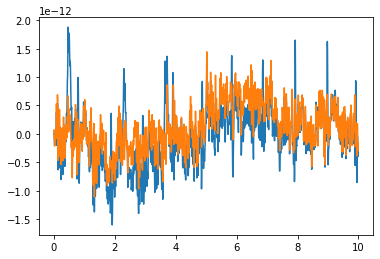

In [4]:
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 10])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
raw_selection = raw['MEG 1411', start_sample:stop_sample]
Clean_raw_selection = Clean_raw['MEG 1411', start_sample:stop_sample]

# Plotting noisy signal (Blue)
n_x = raw_selection[1]   # time
n_y = raw_selection[0].T # data array transposed
plt.plot(n_x, n_y)

# Plotting Clean signal (Orange)
c_x = Clean_raw_selection[1]
c_y = Clean_raw_selection[0].T
plt.plot(c_x, c_y)

In [25]:
print(len(raw_selection[1]))
for i in range(0, 1501):
    print("x value: ", n_x[i])
    print("y value: ", n_y[i])

1501
x value:  0.0
y value:  [8.54415062e-15]
x value:  0.006659840438612929
y value:  [4.91967579e-15]
x value:  0.013319680877225858
y value:  [-3.54318634e-14]
x value:  0.019979521315838786
y value:  [-1.31050327e-13]
x value:  0.026639361754451717
y value:  [-2.08563499e-13]
x value:  0.03329920219306465
y value:  [-1.79741861e-13]
x value:  0.03995904263167757
y value:  [-8.15370032e-14]
x value:  0.0466188830702905
y value:  [-2.43731569e-14]
x value:  0.05327872350890343
y value:  [-3.32560189e-14]
x value:  0.05993856394751636
y value:  [-5.33467034e-14]
x value:  0.0665984043861293
y value:  [-4.60795309e-14]
x value:  0.07325824482474222
y value:  [3.08913186e-14]
x value:  0.07991808526335514
y value:  [2.15086261e-13]
x value:  0.08657792570196808
y value:  [3.82379803e-13]
x value:  0.093237766140581
y value:  [2.88035142e-13]
x value:  0.09989760657919393
y value:  [-4.68585557e-14]
x value:  0.10655744701780687
y value:  [-2.0432507e-13]
x value:  0.11321728745641979
y 

x value:  2.4108622387778804
y value:  [-2.42750425e-13]
x value:  2.4175220792164933
y value:  [-4.04027802e-13]
x value:  2.424181919655106
y value:  [-7.11500079e-13]
x value:  2.430841760093719
y value:  [-9.42115748e-13]
x value:  2.437501600532332
y value:  [-8.98028025e-13]
x value:  2.444161440970945
y value:  [-7.15838022e-13]
x value:  2.450821281409558
y value:  [-6.78505906e-13]
x value:  2.4574811218481707
y value:  [-7.86385627e-13]
x value:  2.4641409622867836
y value:  [-8.00587777e-13]
x value:  2.4708008027253965
y value:  [-6.71095992e-13]
x value:  2.4774606431640094
y value:  [-5.94783689e-13]
x value:  2.4841204836026223
y value:  [-6.52943085e-13]
x value:  2.4907803240412356
y value:  [-7.2222734e-13]
x value:  2.4974401644798485
y value:  [-7.45928486e-13]
x value:  2.5041000049184614
y value:  [-7.73670997e-13]
x value:  2.5107598453570743
y value:  [-7.64140538e-13]
x value:  2.517419685795687
y value:  [-6.67469266e-13]
x value:  2.5240795262343
y value:  [-

y value:  [-2.12450444e-13]
x value:  4.561990700449856
y value:  [-4.13008056e-13]
x value:  4.568650540888469
y value:  [-5.35045317e-13]
x value:  4.575310381327082
y value:  [-5.08998994e-13]
x value:  4.581970221765695
y value:  [-3.07340336e-13]
x value:  4.588630062204308
y value:  [-1.21528832e-13]
x value:  4.595289902642921
y value:  [-2.86598016e-13]
x value:  4.6019497430815335
y value:  [-7.16532892e-13]
x value:  4.608609583520146
y value:  [-8.32741413e-13]
x value:  4.615269423958759
y value:  [-4.2718044e-13]
x value:  4.621929264397373
y value:  [-8.30641978e-14]
x value:  4.628589104835986
y value:  [-2.56223215e-13]
x value:  4.635248945274599
y value:  [-5.07684556e-13]
x value:  4.641908785713212
y value:  [-2.76174486e-13]
x value:  4.648568626151825
y value:  [1.34547781e-13]
x value:  4.6552284665904375
y value:  [9.36086127e-14]
x value:  4.66188830702905
y value:  [-2.84396753e-13]
x value:  4.668548147467663
y value:  [-4.12294409e-13]
x value:  4.6752079879

x value:  7.7453944301068365
y value:  [-2.5552287e-13]
x value:  7.752054270545449
y value:  [-5.2933528e-15]
x value:  7.758714110984062
y value:  [-4.46476679e-14]
x value:  7.765373951422675
y value:  [-1.86367608e-13]
x value:  7.772033791861288
y value:  [-6.96241946e-14]
x value:  7.778693632299901
y value:  [1.66059205e-13]
x value:  7.785353472738514
y value:  [2.09874428e-13]
x value:  7.792013313177127
y value:  [1.27444836e-13]
x value:  7.79867315361574
y value:  [1.42478347e-13]
x value:  7.8053329940543525
y value:  [2.59371471e-13]
x value:  7.811992834492965
y value:  [4.04959989e-13]
x value:  7.818652674931578
y value:  [5.73562822e-13]
x value:  7.825312515370191
y value:  [6.41219904e-13]
x value:  7.831972355808804
y value:  [4.21520424e-13]
x value:  7.838632196247417
y value:  [3.11002288e-14]
x value:  7.84529203668603
y value:  [-1.88028112e-13]
x value:  7.851951877124643
y value:  [-1.87707667e-13]
x value:  7.858611717563256
y value:  [-2.5562628e-13]
x val

In [5]:
num_of_samples = 100
# Containers for samples.
n_samples = []
c_samples = []
n_x_s = [] # array of noisy x values
n_y_s = [] # array of noisy y values
c_x_s = [] # array of clean x values
c_y_s = [] # array of clean y values

for j in range(0,num_of_samples):
    for i in range(0,1501):
        n_x_s.append(n_x[i])
        n_y_s.append(n_y[i][0])
    # Append to noisy Samples
    n_samples.append([n_x_s,n_y_s])

    for k in range(0,1501):
        c_x_s.append(c_x[i])
        c_y_s.append(c_y[i][0])
    # Append to clean Samples
    c_samples.append((c_x_s,c_y_s))

n_samples = np.array(n_samples)
c_samples = np.array(c_samples)
# goal: organize meetings for other research.

In [6]:
# Visualize a few samples
print(n_samples[0][0].shape)

(150100,)


In [7]:
x_val_noisy, y_val_noisy = n_samples[:,0], n_samples[:,1]
x_val_pure, y_val_pure = c_samples[:,0], c_samples[:,1]

In [8]:
print(y_val_noisy.shape)

(100, 150100)


In [8]:
# Reshape Data and utilize Binary Cross Entropy

np.seterr(invalid='ignore')
y_val_noisy_r = []
y_val_pure_r = []
for i in range(0, len(y_val_noisy)):
    noisy_sample = y_val_noisy[i]
    pure_sample = y_val_pure[i]
    noisy_sample = np.nan_to_num((noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample)))
    pure_sample = np.nan_to_num((pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample)))
    y_val_noisy_r.append(noisy_sample)
    y_val_pure_r.append(pure_sample)
    
y_val_noisy_r   = np.array(y_val_noisy_r)
y_val_pure_r    = np.array(y_val_pure_r)
noisy_input     = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input      = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1))  

In [18]:
print(pure_input.shape)

(70, 150100, 1)


In [9]:
# Model Configuration
input_shape = (150100,1)
batch_size = 150
no_epochs = 5
train_test_split = 0.3
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0

In [10]:
# Create the model
model = Sequential()
model.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 150098, 128)       512       
                                                                 
 conv1d_1 (Conv1D)           (None, 150096, 32)        12320     
                                                                 
 conv1d_transpose (Conv1DTra  (None, 150098, 32)       3104      
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 150100, 128)      12416     
 ranspose)                                                       
                                                                 
 conv1d_2 (Conv1D)           (None, 150100, 1)         385       
                                                                 
Total params: 28,737
Trainable params: 28,737
Non-traina

In [11]:
# Train/test split
percentage_training = math.floor((1 - train_test_split) * len(noisy_input))
noisy_input, noisy_input_test = noisy_input[:percentage_training], noisy_input[percentage_training:]
pure_input, pure_input_test = pure_input[:percentage_training], pure_input[percentage_training:]

In [15]:
print(noisy_input)

[[[0.46295841]
  [0.46191714]
  [0.45032458]
  ...
  [0.372192  ]
  [0.34639084]
  [0.37669462]]

 [[0.46295841]
  [0.46191714]
  [0.45032458]
  ...
  [0.372192  ]
  [0.34639084]
  [0.37669462]]

 [[0.46295841]
  [0.46191714]
  [0.45032458]
  ...
  [0.372192  ]
  [0.34639084]
  [0.37669462]]

 ...

 [[0.46295841]
  [0.46191714]
  [0.45032458]
  ...
  [0.372192  ]
  [0.34639084]
  [0.37669462]]

 [[0.46295841]
  [0.46191714]
  [0.45032458]
  ...
  [0.372192  ]
  [0.34639084]
  [0.37669462]]

 [[0.46295841]
  [0.46191714]
  [0.45032458]
  ...
  [0.372192  ]
  [0.34639084]
  [0.37669462]]]


In [ ]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure_input,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Epoch 1/5
